# 27회 실기 문제 
## 1번
데이터 확인 및 전처리

1.1 EDA 데이터 탐색

1.2 변수간 상관관계를 시각화하고 전처리가 필요함을 설명하라

출처

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud (후처리)

In [60]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


In [63]:
df.Class.value_counts()

0    993
1    200
Name: Class, dtype: int64

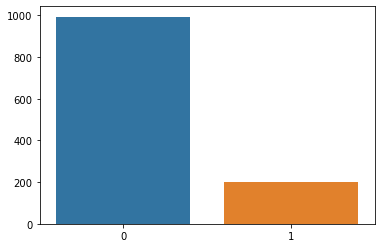

In [64]:
sns.barplot(df.Class.value_counts().index, df.Class.value_counts().values)
plt.show()
# Class 값의 데이터 불균형이 발견된다. 추후 모델링 전에 클래스 불균형을 해소해야 될 필요가 있다.

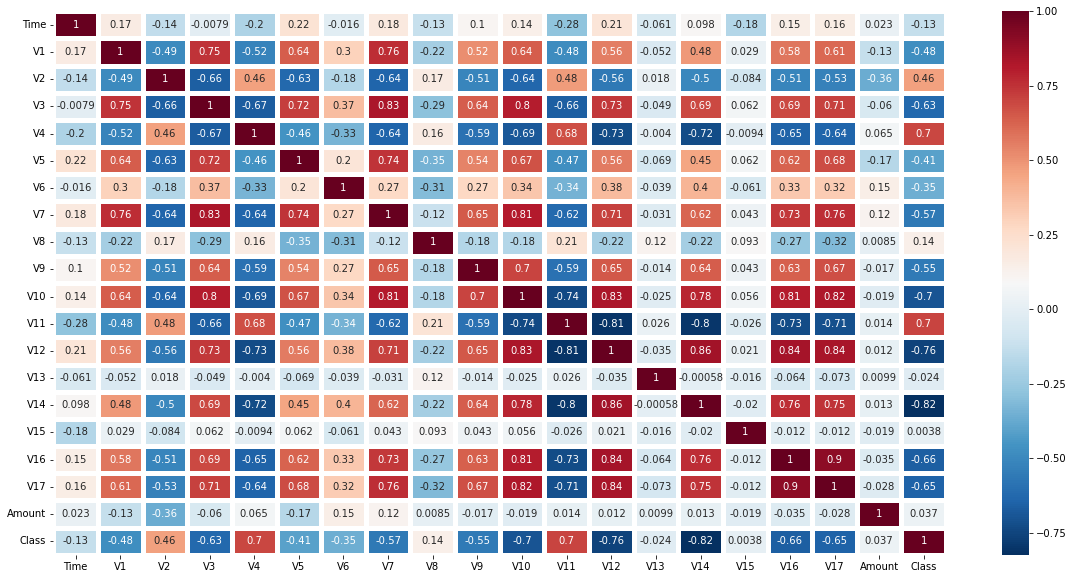

In [65]:
df_cor = df.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(df_cor,
           xticklabels=df_cor.columns,
           yticklabels=df_cor.columns,
           cmap = 'RdBu_r',
           annot=True,
           linewidth=5)
plt.show()

In [66]:
X = df.drop(columns=['Class'])
df_v1 = pd.melt(X, var_name='col', value_name='value')
df_v1

,col,value
0,Time,60.00
1,Time,406.00
2,Time,426.00
3,Time,472.00
4,Time,674.00
...,...,...
22662,Amount,35.00
22663,Amount,4.49
22664,Amount,47.22
22665,Amount,150.00


In [69]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'Amount'],
      dtype='object')

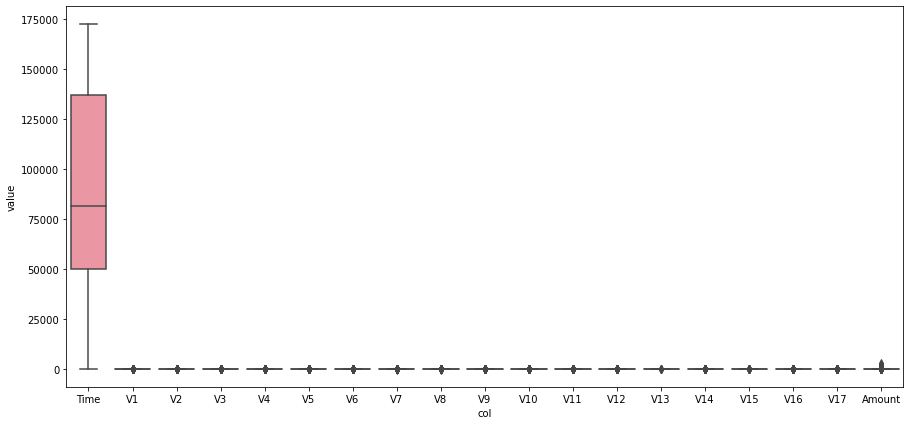

In [74]:
plt.figure(figsize=(15,7))
sns.boxplot(x='col',y='value', data=df_v1)
plt.show()

In [75]:
# 전체 데이터에서 결측치는 존재하지 않는다.
# 종속변수는 int형 독립변수는 float형태로 구성되어 있다.
# 종속변수에는 클래스 불균형이 보인다.
# 종속변수 Class와의 상관계수를 확인해 봤을 떼 , 독립변수에서는 큰 상관성이 없었다. 파생변수를 활용할 필요가 있어 보인다.

## 2번

차원축소 (1번이어서)

2.1 차원축소 방법 2가지 이상 비교하고 한가지 선택

2.2 추천한 한 가지를 실제로 수행하고 선택한 이유 설명

### 1. PCA 
- PCA는 차원 축소에서 가장 많이 사용되는 차원 추출 방법이다. 여러 변수 간에 존재하는 상관관계를 이용하는 차원 축소 방법으로 데이터를 축에 사영했을 때 분산이 가장 높은 축을 찾아 그 축을 새로운 주성분으로 결정하는 방법이다.

### 2. LDA
- LDA는 지도학습 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소하는 방식이다.

### 두 차원축소 비교
- PCA는 입력데이터의 변동성이 가장 큰 축을 찾고 LDA는 입력데이터의 결정값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.

### PCA 선택
- LDA는 이진 분류 문제에서 독립변수를 1개로 축소시키게 된다. 해당 데이터의 독립변수는 19개로 이를 1개로 축소시키게 되면 데이터 손실 문제가 발생하기 때문에 PCA 방법을 선택한다. 

In [76]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Class'])
y = df[['Class']]
df_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=5)
pca.fit(df_scaled)

print('고유 값: ', pca.singular_values_)
print('분산 설명력: ', pca.explained_variance_ratio_)

고유 값:  [105.234544    39.48442197  39.08794063  37.08943079  36.56223415]
분산 설명력:  [0.48856528 0.06877926 0.06740491 0.06068848 0.05897547]


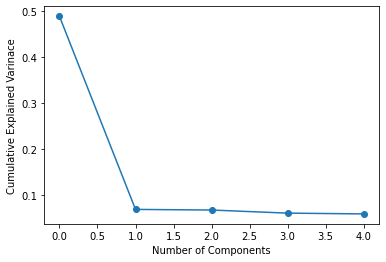

In [77]:
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Varinace')
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

In [78]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
df_pca = pd.DataFrame(data= principalComponents, columns=['pc1','pc2','pc3'])
df_pca

,pc1,pc2,pc3
0,91454.484633,9.996932,-6.044694
1,91108.494217,-79.436951,3.046617
2,91088.492243,-63.254726,-5.623375
3,91042.439065,449.564314,-5.627339
4,90840.491643,-57.467487,-6.021255
...,...,...,...
1188,-80751.508697,-62.261865,-0.761710
1189,-80773.505562,-92.776344,-0.660695
1190,-80814.509980,-50.048225,-0.981695
1191,-81024.520489,52.727274,2.389842


## 3번

오버샘플링/언더샘플링 (1번이어서)

3.1 장/단점 기술하고, 한 가지 추천

3.2 추천한 한 가지를 실제로 수행하고 선택한 이유 설명

3.3 현재까지 전처리한 데이터를 통해 모델 수행 후 결과 분석

- 3.1 장/단점을 기술하고, 한 가지 추천
답: 오버 샘플링 기법은 비중이 작은 데이터를 추가로 생성해 수를 늘려 데이터 불균형을 극복하는 방식이고 언더샘플링은 비중이 큰 데이터를 삭제해 데이터 불균형을 극복하는 방식이다. 언더 샘플링의 경우 데이터 손실 문제로 인해 예측 성능이 저하되는 단점이 있으므로 오버샘플링 기법을 선택한다.

In [79]:
df.Class.value_counts()

0    993
1    200
Name: Class, dtype: int64

In [80]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
import time

X = df.drop(['Class'],axis=1)
y = df[['Class']]

start= time.time()
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X,y)
print('time: ', time.time()-start)

time:  0.004500150680541992


In [81]:
start = time.time()
sm = SMOTE(random_state= 42)
X_sm, y_sm = sm.fit_resample(X,y)
print('time: ', time.time()-start)

time:  0.07699918746948242


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [90]:
X_train, X_test, y_train, y_test= train_test_split(X_sm,y_sm, test_size=0.2, stratify=y_sm, random_state=100)

lr = LogisticRegression()
lr.fit(X_train,y_train)
print('lr 모델 train 정확도: ', lr.score(X_train,y_train))
pred=lr.predict(X_test)
print(classification_report(y_test, pred))


lr 모델 train 정확도:  0.9691435768261965
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       199
           1       0.99      0.95      0.97       199

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



In [91]:
print(confusion_matrix(y_test, pred))

[[197   2]
 [ 10 189]]


In [92]:
rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
rf.fit(X_train, y_train)
print('rf 모델 train 정확도: ', rf.score(X_train, y_train))
pred=rf.predict(X_test)
print(classification_report(y_test, pred))

rf 모델 train 정확도:  0.993073047858942
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       199
           1       0.99      0.96      0.98       199

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [93]:
print(confusion_matrix(y_test, pred))

[[197   2]
 [  7 192]]


## 4번

이상탐지 (1번이어서)

4.1 이상탐지 모델 2가지 이상 기술, 장/단점 설명

4.2 2번에서 만든 데이터로 한 가지 이상탐지 모델을 구현하고, 3번에서 만든 모델과 비교

4.3 데이터분석과 관점에서 3번에서 만든 모델과 4번에서 만든 모델 설명

- 참조 :https://amaruak00.github.io/2022/12/17/adp27th.html

In [98]:
df_pca

,pc1,pc2,pc3
0,91454.484633,9.996932,-6.044694
1,91108.494217,-79.436951,3.046617
2,91088.492243,-63.254726,-5.623375
3,91042.439065,449.564314,-5.627339
4,90840.491643,-57.467487,-6.021255
...,...,...,...
1188,-80751.508697,-62.261865,-0.761710
1189,-80773.505562,-92.776344,-0.660695
1190,-80814.509980,-50.048225,-0.981695
1191,-81024.520489,52.727274,2.389842


In [101]:
X_train, X_test, y_train, y_test= train_test_split(df_pca,y, test_size=0.2, stratify=y, random_state=100)
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('lr 모델 train 정확도: ', lr.score(X_train,y_train))
pred=lr.predict(X_test)
print(classification_report(y_test, pred))

lr 모델 train 정확도:  0.9612159329140462
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       199
           1       0.88      0.95      0.92        40

    accuracy                           0.97       239
   macro avg       0.94      0.96      0.95       239
weighted avg       0.97      0.97      0.97       239



In [102]:
print(confusion_matrix(y_test, pred))

[[194   5]
 [  2  38]]


In [103]:
rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
rf.fit(X_train, y_train)
print('rf 모델 train 정확도: ', rf.score(X_train, y_train))
pred=rf.predict(X_test)
print(classification_report(y_test, pred))

rf 모델 train 정확도:  0.9706498951781971
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       199
           1       0.93      0.95      0.94        40

    accuracy                           0.98       239
   macro avg       0.96      0.97      0.96       239
weighted avg       0.98      0.98      0.98       239



In [104]:
print(confusion_matrix(y_test, pred))

[[196   3]
 [  2  38]]


## 5번

2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [109]:
# 기하평균
round((((15/10)*(25/15))**(1/2)-1)*100,2)

58.11

## 6번
12건의 광고 시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?

In [113]:
from scipy import stats 
stats.t.interval(alpha=0.9, loc=15.5, scale=np.sqrt(3.2/12), df=12-1)

(14.572609067393861, 16.427390932606137)

## 7번

강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

7.1 귀무가설과 대립가설을 세우시오

7.2 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

In [1]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv')
df.head()

,River,up,down
0,A,57.1,45.7
1,B,51.6,37.2
2,C,53.9,53.3
3,D,59.0,54.3
4,E,57.5,46.3


In [3]:
# 7.1 귀무가설과 대립가설을 세우시오
# 귀무가설: 강의 상류와 하류의 생물 다양성 점수에는 차이가 없다.
# 대립가설: 강의 상류와 하류의 생물 다양성 점수에는 차이가 있다.

In [6]:
# 7.2 검정 통계량과 유의확률을 구하고, 연구가설 채택여부를 검정하시오.
from scipy import stats
print(stats.shapiro(df['up']))
print(stats.shapiro(df['down']))
# 정규성 검정 결과 up, down 변수 모두 정규성을 만족한다.

ShapiroResult(statistic=0.9635884165763855, pvalue=0.6447697877883911)
ShapiroResult(statistic=0.9821230173110962, pvalue=0.9640804529190063)


In [8]:
stats.ttest_rel(df['up'],df['down'],alternative='two-sided')
# 검정통계량:1.2922226959983891, p-value: 0.21262429174344777
# 검정결과 p-value가 0.05보다 크므로 귀무가설을 기각하지 못한다.
# 즉 강의 상류와 하류의 생물 다양성 점수에는 차이가 없다.

Ttest_relResult(statistic=1.2922226959983891, pvalue=0.21262429174344777)

## 8번

user_counts를 종속변수로 하는 데이터이다

8.1 분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

8.2 8.1의 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오

In [9]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv')
df.head()

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


In [42]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
formula = 'user_counts~temperature+wind+precipitation'
model=smf.quantreg(formula= formula, data = df).fit(q=0.5)

model.summary()
# y = 5941.84+ 268.89*temperature -129.40 * wind -83.38*precipitation

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:            user_counts   Pseudo R-squared:               0.3723
Model:                       QuantReg   Bandwidth:                       840.9
Method:                 Least Squares   Sparsity:                        5590.
Date:                Tue, 28 Feb 2023   No. Observations:                 2097
Time:                        14:42:56   Df Residuals:                     2093
                                        Df Model:                            3
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5941.8395    198.127     29.990      0.000    5553.293    6330.386
temperature     268.8920      6.571     40.918      0.000     256.005     281.779
wind           -129.4050     46.259     -2.797      0.005    -220.124     -38.686
precipitation   -83.3843      7.891    -10.567      0.000     -98.859     -67.910
=================================================================================
"""

In [43]:
# 8.2
y = 5941.84+ 268.89*10.5 -129.40 * 8.2 -83.38*3.5
y

7412.275

In [47]:
data

array([10.5,  8.2,  3.5])

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:            user_counts   Pseudo R-squared:               0.3723
Model:                       QuantReg   Bandwidth:                       840.9
Method:                 Least Squares   Sparsity:                        5590.
Date:                Tue, 28 Feb 2023   No. Observations:                 2097
Time:                        14:45:50   Df Residuals:                     2093
                                        Df Model:                            3
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5941.8395    198.127     29.990      0.000    5553.293    6330.386
temperature     268.8920      6.571     40.918      0.000     256.005     281.779
wind           -129.4050     46.259     -2.797      0.005    -220.124     -38.686
precipitation   -83.3843      7.891    -10.567      0.000     -98.859     -67.910
=================================================================================
"""

In [50]:
df

,temperature,wind,precipitation,user_counts
0,10.400000,4.600000,0.844944,6368
1,5.666667,4.625000,0.040860,5902
2,4.933333,4.725000,0.008696,6226
3,3.400000,2.675000,0.156989,5829
4,8.900000,3.950000,7.988462,7589
...,...,...,...,...
2092,3.500000,2.100000,0.024096,5430
2093,8.233333,2.000000,16.843820,2125
2094,9.500000,3.666667,11.550575,6008
2095,4.800000,1.200000,0.104651,4929


In [55]:
df1 = pd.DataFrame({'temperature':[10.5], 'wind':[8.2], 'precipitation':[3.8]})
df1

,temperature,wind,precipitation
0,10.5,8.2,3.8


In [56]:
model.predict(df1)

0    7387.224253
dtype: float64

## 9번

지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인(Type III Anova 사용) - Type ||| Anova는 불균형 자료일 때 사용

9.1 귀무가설과 대립가설 설정하라

9.2 통계량을 구하고, 대립가설 채택여부를 기술하라

In [57]:
# 귀무가설: 지하철 호선과 월 변수의 상호작용 효과가 없다.
# 귀무가설2: 지하철 호선에 따른 승객 수의 값에는 차이가 없다.
# 귀무가설3: 월에 따른 승객 수의 값에는 차이가 없다.
# 연구가설: 지하철 호선과 월 변수의 상호작용 효과가 있다.
# 연구가설2: 지하철 호선에 다른 승객 수 값에는 차이가 있다.
# 연구가설3: 월에 따른 승객 수의 값에는 차이가 있다.

In [ ]:
# 9.2 데이터가 없어서 이만...
